## Predicting Machine Downtimes
1. Exploring correlations between the various operational data in the dataset.
2. Identifying patterns in machine downtime occurs over time.
3. Factors (visually) that seem to be connected to machine downtime.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [16]:
df=pd.read_csv('machine_downtime.csv')

### EDA & Data Cleaning

In [4]:
# total number of records and values
df.shape

(2500, 16)

In [5]:
#List of columns
df.columns.to_list()

['Date',
 'Machine_ID',
 'Assembly_Line_No',
 'Hydraulic_Pressure(bar)',
 'Coolant_Pressure(bar)',
 'Air_System_Pressure(bar)',
 'Coolant_Temperature',
 'Hydraulic_Oil_Temperature',
 'Spindle_Bearing_Temperature',
 'Spindle_Vibration',
 'Tool_Vibration',
 'Spindle_Speed(RPM)',
 'Voltage(volts)',
 'Torque(Nm)',
 'Cutting(kN)',
 'Downtime']

In [6]:
#Checking the nature of our first three rows
df.head(3)

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure


In [7]:
#Last 3 rows
df.tail(3)

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
2497,01-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,01-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure
2499,01-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,96.690000,5.936610,7.109355,29.8,53.2,36.2,0.840,31.580,23576.0,385.0,24.409551,3.55,Machine_Failure


In [8]:
#info of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         2500 non-null   object 
 1   Machine_ID                   2500 non-null   object 
 2   Assembly_Line_No             2500 non-null   object 
 3   Hydraulic_Pressure(bar)      2490 non-null   float64
 4   Coolant_Pressure(bar)        2481 non-null   float64
 5   Air_System_Pressure(bar)     2483 non-null   float64
 6   Coolant_Temperature          2488 non-null   float64
 7   Hydraulic_Oil_Temperature    2484 non-null   float64
 8   Spindle_Bearing_Temperature  2493 non-null   float64
 9   Spindle_Vibration            2489 non-null   float64
 10  Tool_Vibration               2489 non-null   float64
 11  Spindle_Speed(RPM)           2494 non-null   float64
 12  Voltage(volts)               2494 non-null   float64
 13  Torque(Nm)        

In [9]:
#Descriptive statistics
df.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


In [10]:
#Checking for nulls
df.isnull().sum()

Date                            0
Machine_ID                      0
Assembly_Line_No                0
Hydraulic_Pressure(bar)        10
Coolant_Pressure(bar)          19
Air_System_Pressure(bar)       17
Coolant_Temperature            12
Hydraulic_Oil_Temperature      16
Spindle_Bearing_Temperature     7
Spindle_Vibration              11
Tool_Vibration                 11
Spindle_Speed(RPM)              6
Voltage(volts)                  6
Torque(Nm)                     21
Cutting(kN)                     7
Downtime                        0
dtype: int64

<Axes: >

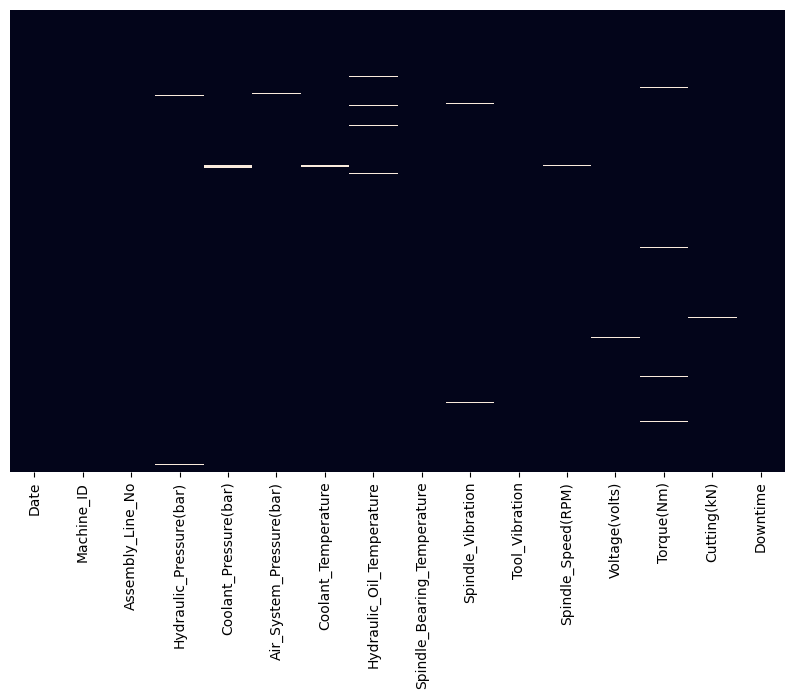

In [11]:
#visualizing missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False, yticklabels=False)

Text(0.5, 1.0, 'Missing Values')

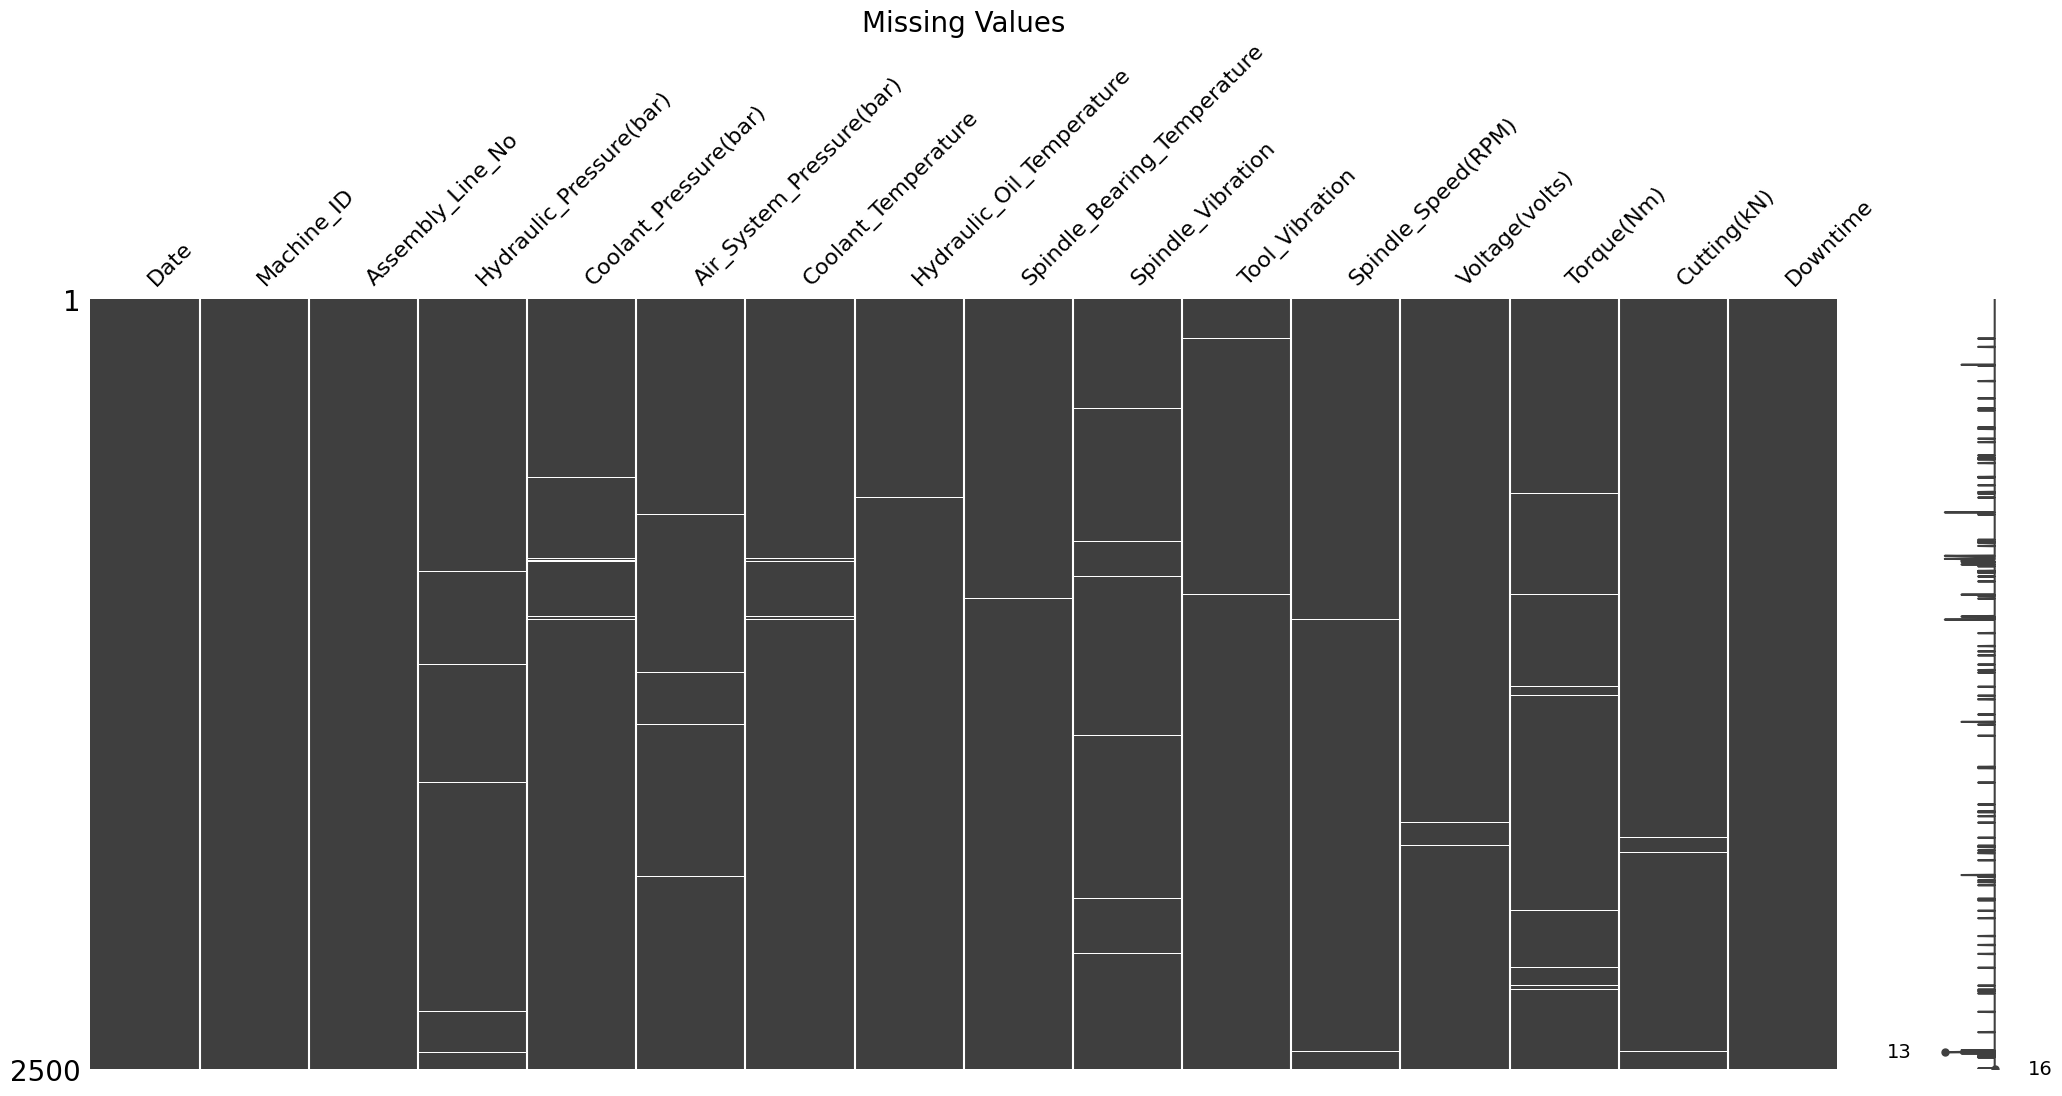

In [12]:
#Visualizing nulls using matrix method
msno.matrix(df,sparkline=True)
plt.title('Missing Values',fontsize=20)


In [13]:
#Duplicated rows
df.duplicated().sum()

np.int64(0)

In [36]:
#Renaming columns
df=df.rename(columns={'Date':'recorded_date',
                        'Machine_ID':'machine_id',
                        'Assembly_Line_No':'assembly_line_no',
                        'Hydraulic_Pressure(bar)':'hydraulic_pressure_bar',
                        'Coolant_Pressure(bar)':'coolant_pressure_bar',
                        'Air_System_Pressure(bar)':'airsystem_pressure_bar',
                        'Coolant_Temperature':'coolant_temp',
                        'Hydraulic_Oil_Temperature':'hydraulic_oil_temp',
                        'Spindle_Bearing_Temperature': 'spindle_bearing_temp',
                        'Spindle_Vibration':'spindle_vibration',
                        'Tool_Vibration':'tool_vibration',
                        'Spindle_Speed(RPM)':'spindle_speed_rpm',
                        'Voltage(volts)':'volts',
                        'Torque(Nm)':'torque_nm',
                        'Cutting(kN)':'cutting_kn',
                        'Downtime':'downtime'})


In [ ]:
#Replacing null values
df=df['Air_System_Pressure(bar)'].fillna(0)

In [23]:
df=df.fillna(0)

In [37]:
#Checking the updates for nulls
df.isnull().sum()

recorded_date             0
machine_id                0
assembly_line_no          0
hydraulic_pressure_bar    0
coolant_pressure_bar      0
airsystem_pressure_bar    0
coolant_temp              0
hydraulic_oil_temp        0
spindle_bearing_temp      0
spindle_vibration         0
tool_vibration            0
spindle_speed_rpm         0
volts                     0
torque_nm                 0
cutting_kn                0
downtime                  0
dtype: int64

### Exploring correlations between the various operational data in the dataset.

In [ ]:
#Correlation between two columns
correlation=df['Coolant_Temperature'].corr(df['Spindle_Speed(RPM)'])
correlation

np.float64(0.0903376690421886)

In [43]:
#Correlation between two columns
df['coolant_temp'].corr(df['spindle_bearing_temp'])

np.float64(-0.00946685338545067)

In [ ]:
#correlation between one column against the rest
#df.corr()['downtime']

In [46]:
#Correlation for numerical columns in the data set
corr_1=df[['hydraulic_pressure_bar','coolant_pressure_bar','airsystem_pressure_bar',
    'coolant_temp','hydraulic_oil_temp','spindle_bearing_temp','spindle_vibration',
    'tool_vibration','spindle_speed_rpm','volts','torque_nm','cutting_kn']].corr()
corr_1

,hydraulic_pressure_bar,coolant_pressure_bar,airsystem_pressure_bar,coolant_temp,hydraulic_oil_temp,spindle_bearing_temp,spindle_vibration,tool_vibration,spindle_speed_rpm,volts,torque_nm,cutting_kn
hydraulic_pressure_bar,1.000000,-0.089834,-0.003557,-0.115544,-0.004038,0.020856,-0.014363,0.020601,-0.114141,-0.017996,0.149687,-0.210089
coolant_pressure_bar,-0.089834,1.000000,-0.012248,0.013095,0.031795,-0.016608,-0.006089,-0.003662,0.106268,0.029707,-0.091729,0.155587
airsystem_pressure_bar,-0.003557,-0.012248,1.000000,0.021965,0.021985,0.017652,-0.007577,0.021078,0.004000,0.008896,0.007923,-0.005678
coolant_temp,-0.115544,0.013095,0.021965,1.000000,0.020655,-0.009467,0.013315,0.004313,0.090338,0.010224,-0.057547,0.107044
hydraulic_oil_temp,-0.004038,0.031795,0.021985,0.020655,1.000000,0.020114,-0.010692,0.014268,0.004504,0.036965,0.002922,-0.012441
spindle_bearing_temp,0.020856,-0.016608,0.017652,-0.009467,0.020114,1.000000,-0.019707,0.006681,0.017166,0.029989,-0.008288,0.010043
spindle_vibration,-0.014363,-0.006089,-0.007577,0.013315,-0.010692,-0.019707,1.000000,-0.005361,0.027533,0.002976,0.027166,-0.014949
tool_vibration,0.020601,-0.003662,0.021078,0.004313,0.014268,0.006681,-0.005361,1.000000,0.003520,0.016005,-0.010295,-0.047550
spindle_speed_rpm,-0.114141,0.106268,0.004000,0.090338,0.004504,0.017166,0.027533,0.003520,1.000000,-0.024125,-0.170401,0.228667
volts,-0.017996,0.029707,0.008896,0.010224,0.036965,0.029989,0.002976,0.016005,-0.024125,1.000000,0.014651,-0.034336


In [ ]:
#Converting downtime column from string into numeric
df['downtime_code']=pd.factorize(df['downtime'])[0]
df['downtime_code']

In [ ]:
#Finding correlation among all numerical columns including downtime after conversion
subset=['hydraulic_pressure_bar','coolant_pressure_bar','airsystem_pressure_bar',
    'coolant_temp','hydraulic_oil_temp','spindle_bearing_temp','spindle_vibration',
    'tool_vibration','spindle_speed_rpm','volts','torque_nm','cutting_kn','downtime_code']
data_corr=(df[subset].corr()).round(2)

<Axes: >

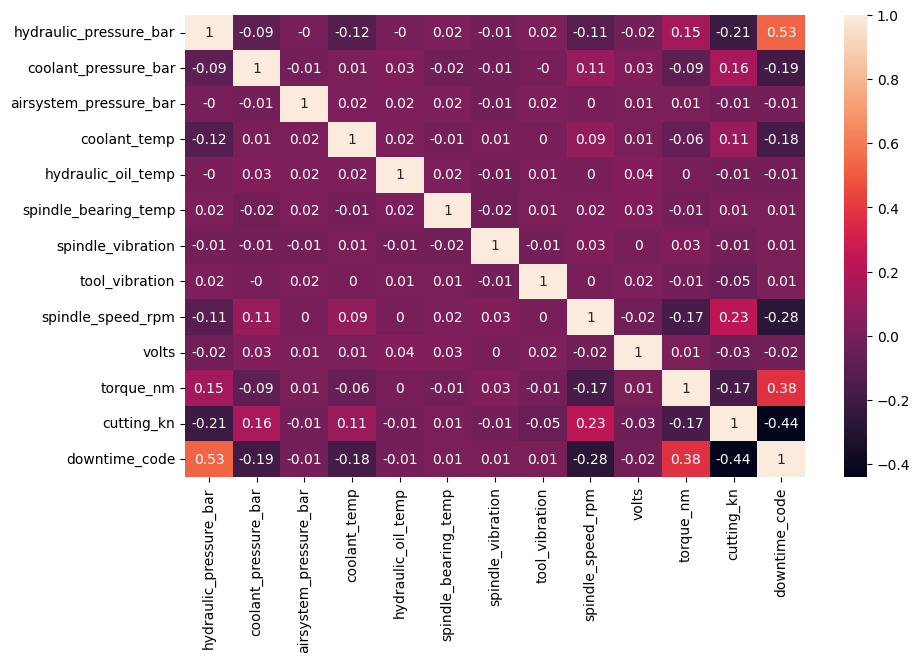

In [ ]:
#Visualizing Correlation
plt.figure(figsize=(10,6))
sns.heatmap(data_corr,annot=True)


([<matplotlib.patches.Wedge at 0x1f9d95d5c70>,
 [Text(-0.020733261540085385, 1.0998045880363978, 'Machine_Failure'),
  Text(0.020733619901906, -1.0998045812805852, 'No_Machine_Failure')],
 [Text(-0.011309051749137482, 0.5998934116562169, '50.6%'),
  Text(0.011309247219221453, -0.5998934079712283, '49.4%')])

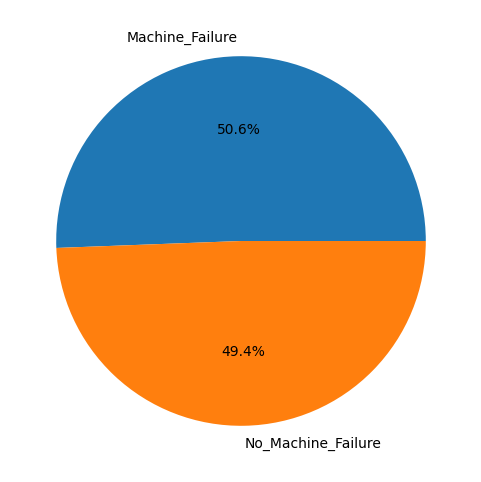

In [ ]:
#Pie chart visual of downtime distribution
pie_data=df['downtime'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(pie_data,labels=pie_data.index,autopct='%1.1f%%')

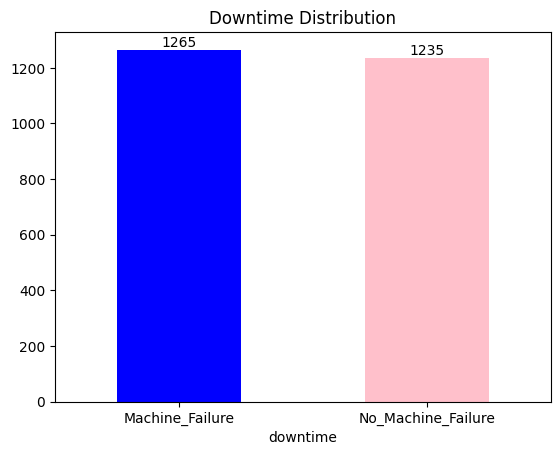

In [109]:
#Bar Visual
#colors='blue','grey'
ax=pie_data.plot(kind='bar',color=('blue','pink'))
plt.xticks(rotation=360)
plt.title('Downtime Distribution')
# Adding data Labels
ax.bar_label(ax.containers[0]);

### Identifying patterns in machine downtime over time.

In [ ]:
#Setting the recorded date into timestamp
df['recorded_date']=pd.to_datetime(df['recorded_date'],errors='coerce',dayfirst=True)


In [130]:
#Extracting month
df['month_extract']=df['recorded_date'].dt.month_name()
df['month_extract']

0       December
1       December
2       December
3            May
4          March
          ...   
2495    February
2496    February
2497    February
2498    February
2499    February
Name: month_extract, Length: 2500, dtype: object

In [168]:
#Finding monthly downtime distribution
#Identifying failures and non failures using bools
machine_failure=df[df['downtime']=='Machine_Failure']
machine_failure
#Grouping downtime by month
monthly_downtime=df.groupby('month_extract')['downtime'].value_counts()
monthly_downtime

month_extract  downtime          
April          Machine_Failure       280
               No_Machine_Failure    247
December       Machine_Failure        13
               No_Machine_Failure     11
February       No_Machine_Failure    301
               Machine_Failure       296
January        No_Machine_Failure     91
               Machine_Failure        87
July           Machine_Failure         1
June           Machine_Failure         4
               No_Machine_Failure      4
March          Machine_Failure       533
               No_Machine_Failure    515
May            No_Machine_Failure     66
               Machine_Failure        50
November       Machine_Failure         1
Name: count, dtype: int64

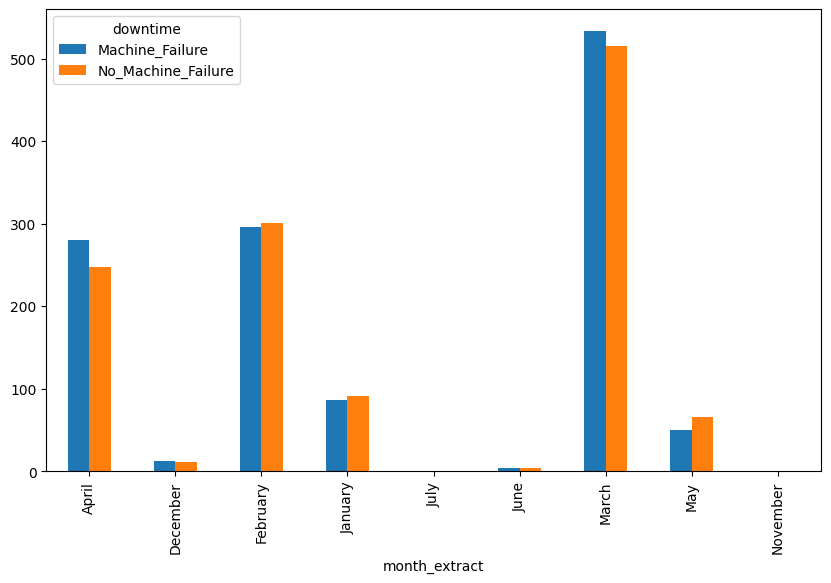

In [172]:
#Visualizing above grouped data(multiIndex series)
#Start by unstacking the output so that you are able to plot a clustered chart
unstacked_monthly_downtime=monthly_downtime.unstack(fill_value=0)
ax=unstacked_monthly_downtime.plot(kind='bar',figsize=(10,6))

### Factors (visually) that seem to be connected to machine downtime.